In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Dataset_nilai.csv


In [2]:
grades = pd.read_csv("../input/Dataset_nilai.csv",index_col=False)

In [3]:
grades.head()

,kelompok,id,kelas,Latihan_1,Tugas_1,Latihan_2,Tugas_2,Latihan_3,Tugas_3,Latihan_4,...,Tugas_8,Tugas_9,ttd_kpp,rata_rata,nilai_individu,nilai_akhir_laporan,utp_total,utp_esai,utp_koding,nilai_akhir
0,1.0,1.0,F,90,85,95.0,90.0,81,87,96,...,82.0,78.0,v,87.000,90.0,87.6,67.0,52.0,15.0,79.36
1,1.0,2.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,82.5,85.6,62.0,52.0,10.0,76.16
2,1.0,3.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,92.5,87.6,62.0,52.0,10.0,77.36
3,1.0,4.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,82.5,85.6,62.0,52.0,10.0,76.16
4,1.0,5.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,85.0,86.1,62.0,52.0,10.0,76.46


In [4]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 27 columns):
kelompok               209 non-null float64
id                     209 non-null float64
kelas                  209 non-null object
Latihan_1              243 non-null int64
Tugas_1                243 non-null int64
Latihan_2              243 non-null float64
Tugas_2                243 non-null float64
Latihan_3              243 non-null int64
Tugas_3                243 non-null int64
Latihan_4              243 non-null int64
Tugas_4                243 non-null float64
Latihan_5              243 non-null int64
Tugas_5                243 non-null int64
Tugas_6                243 non-null int64
Latihan_7              243 non-null int64
Tugas_7                243 non-null int64
Latihan_8              243 non-null float64
Tugas_8                243 non-null float64
Tugas_9                243 non-null float64
ttd_kpp                85 non-null object
rata_rata              86 non-null flo

In [5]:
grades.utp_total.describe()

count    241.000000
mean      72.391494
std       16.512829
min        0.000000
25%       64.400000
50%       75.000000
75%       82.200000
max      110.000000
Name: utp_total, dtype: float64

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


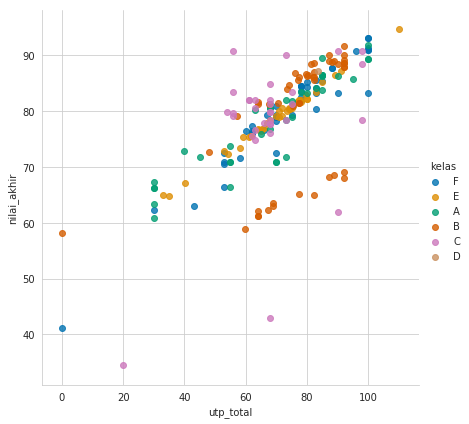

In [6]:
sns.set_style('whitegrid')
sns.lmplot('utp_total','nilai_akhir',data=grades, hue = 'kelas',
           palette='colorblind',size=6,aspect=1,fit_reg=False)

In [7]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

data_imputer = SimpleImputer()

data_copy = grades.copy()

x = data_copy.loc[:,['utp_total','nilai_akhir']]

imputed_data = data_imputer.fit_transform(x)

imputed_data

array([[ 67.        ,  79.36      ],
       [ 62.        ,  76.16      ],
       [ 62.        ,  77.36      ],
       [ 62.        ,  76.16      ],
       [ 62.        ,  76.46      ],
       [ 96.        ,  90.87      ],
       [ 88.        ,  87.67      ],
       [ 83.        ,  85.67      ],
       [ 60.        ,  76.47      ],
       [ 88.        ,  87.67      ],
       [ 75.        ,  81.15      ],
       [100.        ,  91.27      ],
       [100.        ,  90.97      ],
       [ 83.        ,  84.17      ],
       [100.        ,  90.97      ],
       [ 80.        ,  84.38      ],
       [ 78.        ,  83.58      ],
       [ 66.        ,  76.68      ],
       [ 85.        ,  85.48      ],
       [ 70.        ,  78.28      ],
       [ 80.        ,  85.25      ],
       [ 78.        ,  84.45      ],
       [ 78.        ,  84.45      ],
       [ 78.        ,  84.45      ],
       [ 30.        ,  62.25      ],
       [  0.        ,  41.25      ],
       [ 70.        ,  79.27      ],
 

In [8]:
kmeans = KMeans(3)

In [9]:
kmeans.fit(imputed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Result

In [10]:
identified_clusters = kmeans.fit_predict(imputed_data)

identified_clusters

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       2], dtype=int32)

In [11]:
data_with_clusters = data_copy.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,kelompok,id,kelas,Latihan_1,Tugas_1,Latihan_2,Tugas_2,Latihan_3,Tugas_3,Latihan_4,...,Tugas_9,ttd_kpp,rata_rata,nilai_individu,nilai_akhir_laporan,utp_total,utp_esai,utp_koding,nilai_akhir,Cluster
0,1.0,1.0,F,90,85,95.00,90.00,81,87,96,...,78.0,v,87.0000,90.0,87.600000,67.00,52.00,15.0,79.36,0
1,1.0,2.0,F,90,85,95.00,90.00,76,82,96,...,78.0,v,86.3750,82.5,85.600000,62.00,52.00,10.0,76.16,0
2,1.0,3.0,F,90,85,95.00,90.00,76,82,96,...,78.0,v,86.3750,92.5,87.600000,62.00,52.00,10.0,77.36,0
3,1.0,4.0,F,90,85,95.00,90.00,76,82,96,...,78.0,v,86.3750,82.5,85.600000,62.00,52.00,10.0,76.16,0
4,1.0,5.0,F,90,85,95.00,90.00,76,82,96,...,78.0,v,86.3750,85.0,86.100000,62.00,52.00,10.0,76.46,0
5,2.0,6.0,F,82,86,92.00,90.00,82,85,96,...,78.0,v,84.3125,100.0,87.450000,96.00,66.00,30.0,90.87,1
6,2.0,7.0,F,82,86,92.00,90.00,82,85,96,...,78.0,v,84.3125,100.0,87.450000,88.00,63.00,25.0,87.67,1
7,2.0,8.0,F,82,86,92.00,90.00,82,85,96,...,78.0,v,84.3125,100.0,87.450000,83.00,58.00,25.0,85.67,1
8,2.0,9.0,F,82,86,92.00,90.00,82,85,96,...,78.0,v,84.3125,100.0,87.450000,60.00,52.00,8.0,76.47,0
9,2.0,10.0,F,82,86,92.00,90.00,82,85,96,...,78.0,v,84.3125,100.0,87.450000,88.00,63.00,25.0,87.67,1


/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 100)

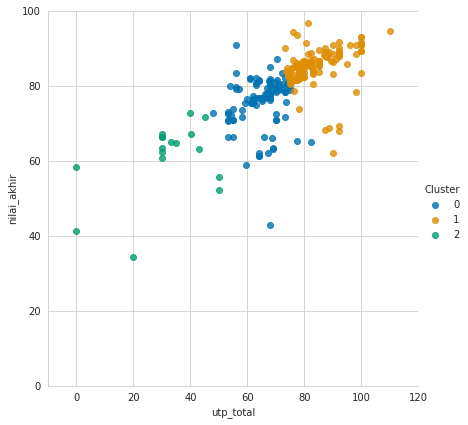

In [12]:
sns.lmplot('utp_total','nilai_akhir',data=data_with_clusters, hue = 'Cluster',
           palette='colorblind',size=6,aspect=1,fit_reg=False)
plt.xlim(-10,120)
plt.ylim(0,100)

## Elbow Method

In [13]:
kmeans.inertia_

24966.367356309405

In [15]:
wcss = []

cl_num = 11
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(imputed_data)
    wcss_iteration = kmeans.inertia_
    wcss.append(wcss_iteration)

Text(0, 0.5, 'Within cluster Sum of Squares')

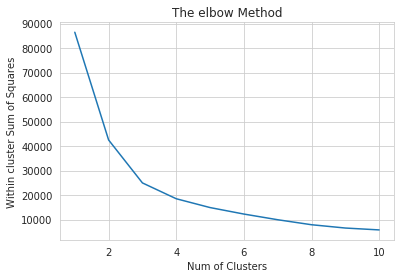

In [18]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title("The elbow Method")
plt.xlabel("Num of Clusters")
plt.ylabel("Within cluster Sum of Squares")